In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import shap
import lime
import lime.lime_tabular

In [6]:
# 1. Load the data
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

In [7]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# 3. Train the RandomForestClassifier model
your_model = RandomForestClassifier(random_state=42)
your_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
accuracy = your_model.score(X_test, y_test)
print(f"Model Accuracy on Test Set: {accuracy:.4f}\n")

Model Accuracy on Test Set: 0.9649



Generating SHAP summary plot...


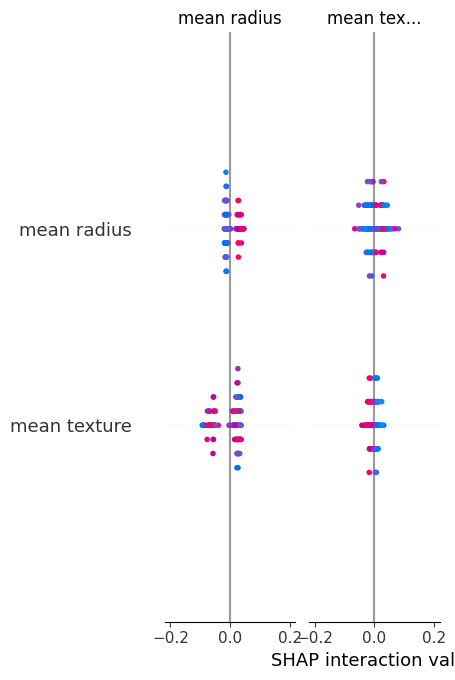

SHAP plot generated.


In [10]:
# 4. Use SHAP for global interpretability
print("Generating SHAP summary plot...")
explainer = shap.TreeExplainer(your_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
print("SHAP plot generated.")

In [11]:
# 5. Use LIME for local interpretability
print("\nGenerating LIME explanation for a single prediction...")
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['benign', 'malignant'],
    discretize_continuous=True
)



Generating LIME explanation for a single prediction...


In [12]:
i = 0
exp = explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=your_model.predict_proba,
    num_features=5
)

# Print the explanation details
print(f"Prediction for instance {i}: {your_model.predict_proba(X_test.iloc[[i]])[0]}")
print("Explanation for the prediction:")
for feature, value in exp.as_list():
    print(f"- {feature}: {value:.4f}")

C:\Users\kawsa\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction for instance 0: [0.03 0.97]
Explanation for the prediction:
- 516.45 < worst area <= 686.60: 0.0813
- 84.25 < worst perimeter <= 97.67: 0.0533
- 13.05 < worst radius <= 14.97: 0.0430
- 24.72 < area error <= 43.73: 0.0184
- 0.10 < worst concave points <= 0.16: 0.0162
